In [25]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import zipfile
import re
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
%matplotlib inline
from matplotlib.pyplot import figure
import matplotlib
from sklearn.neighbors import KernelDensity
import os

import datetime
from datetime import datetime, timedelta
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
zf = zipfile.ZipFile('Data/Data_incidents.csv.zip') 
data = pd.read_csv('Data/Data_incidents.csv.zip').reset_index()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Mass shootings

In [3]:
data = data.drop(columns=['index','Unnamed: 0'])

In [4]:
mass_shootings = data[data['Mass Shooting']==True]

# Mass Shootings Timelines

In [5]:
ms_dates = mass_shootings[['Date','state','n_killed','n_injured']].reset_index()
ms_dates=ms_dates.drop(columns = 'index')

In [6]:
# format date
ms_dates['date'] = pd.to_datetime(ms_dates.Date.str.strip(), format = '%Y-%m-%d')#
ms_dates=ms_dates.drop(columns = 'Date');

### Define study areas

In [7]:
#North East Central
northeast = ['Illinois','Wisconsin','Michigan','Indiana']
ms_northeast= ms_dates.loc[ms_dates['state'].isin(northeast)].reset_index()
ms_northeast=ms_northeast.drop(columns = 'index')

#Mid-Atlantic
middleatlantic = ['Connecticut','Massachusetts','Delaware','Maryland','New York','Pennsylvania','New Jersey']
ms_midatlantic= ms_dates.loc[ms_dates['state'].isin(middleatlantic)].reset_index()
ms_midatlantic=ms_midatlantic.drop(columns = 'index')

#California
ms_cali = ms_dates[ms_dates['state']== 'California'].reset_index()
ms_cali=ms_cali.drop(columns = 'index')

### California timeline

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


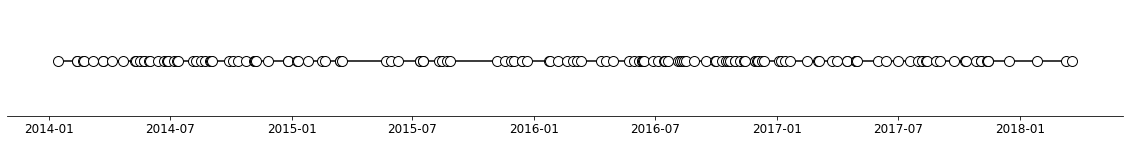

In [8]:
# Choose some nice levels
levels_cali = np.tile([-1, 1, -1, 1, -1, 1],
                 int(np.ceil(len(ms_cali.date)/6)))[:len(ms_cali.date)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 2)) #constrained_layout=True)


markerline, stemline, baseline = ax.stem(ms_cali.date, levels_cali,
                                         linefmt="white", basefmt="k-",
                                         use_line_collection=True)



plt.setp(markerline, mec="k", mfc="w", zorder=3,markersize=10)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(ms_cali.date)))

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)


plt.xticks(fontsize=12)
plt.ylim(bottom=-0.25)
plt.ylim(top=0.25)


plt.show()

### North East Central Timeline

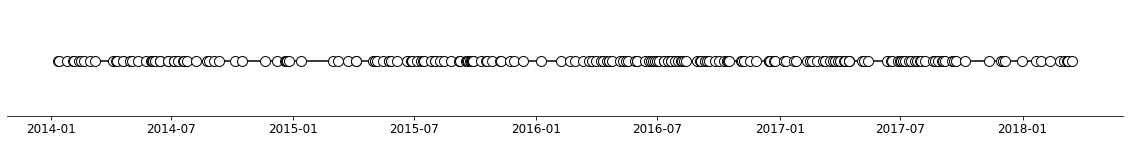

In [9]:
levels_NE = np.tile([-1, 1, -1, 1, -1, 1],
                 int(np.ceil(len(ms_northeast.date)/6)))[:len(ms_northeast.date)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 2)) #constrained_layout=True)

markerline, stemline, baseline = ax.stem(ms_northeast.date, levels_NE,
                                         linefmt="white", basefmt="k-",
                                         use_line_collection=True)



plt.setp(markerline, mec="k", mfc="w", zorder=3,markersize=10)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(ms_northeast.date)))

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)


plt.xticks(fontsize=12)
plt.ylim(bottom=-0.25)
plt.ylim(top=0.25)


plt.show()

### Mid-Atlantic Timeline

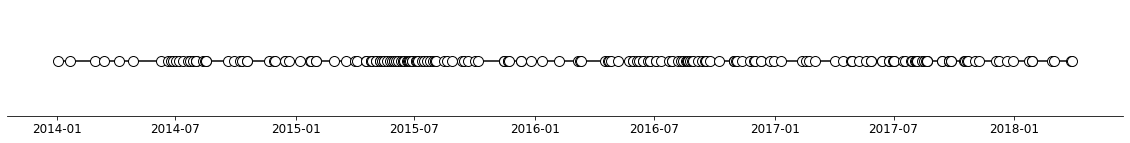

In [10]:
levels_MA = np.tile([-1, 1, -1, 1, -1, 1],
                 int(np.ceil(len(ms_midatlantic.date)/6)))[:len(ms_midatlantic.date)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 2)) #constrained_layout=True)

markerline, stemline, baseline = ax.stem(ms_midatlantic.date, levels_MA,
                                         linefmt="white", basefmt="k-",
                                         use_line_collection=True)



plt.setp(markerline, mec="k", mfc="w", zorder=3,markersize=10)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(ms_midatlantic.date)))

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)


plt.xticks(fontsize=12)
plt.ylim(bottom=-0.25)
plt.ylim(top=0.25)


plt.show()

# Kernel Density Estimation 

### Format dates to ordinal to get proper ordering

In [11]:
ms_cali['ordinal'] = [x.toordinal() for x in ms_cali.date]
ms_northeast['ordinal'] = [x.toordinal() for x in ms_northeast.date]
ms_midatlantic['ordinal'] = [x.toordinal() for x in ms_midatlantic.date]

#define max and min values
ms_dates['ordinal'] = [x.toordinal() for x in ms_dates.date]
min_ = ms_dates['ordinal'].min()
max_ = ms_dates['ordinal'].max()

In [12]:
# Finding optimal bandwidths using silverman i.e. minimizing squared errors (check notes from AME)

#California
kde_cali = gaussian_kde(ms_cali['ordinal'], bw_method = 'silverman')
bw_cali = kde_cali.factor

#North east central
kde_NE = gaussian_kde(ms_northeast['ordinal'], bw_method = 'silverman')
bw_NE = kde_NE.factor


#Midatlantic
kde_MA = gaussian_kde(ms_midatlantic['ordinal'], bw_method = 'silverman')
bw_MA = kde_MA.factor

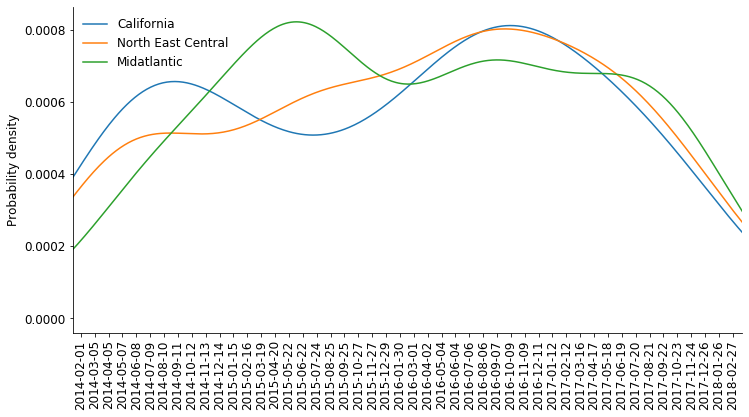

In [13]:
matplotlib.rc('xtick', labelsize = 12)
matplotlib.rc('ytick', labelsize = 12)

fig, ax = plt.subplots(1, figsize=(12, 6))

ax = ms_cali['ordinal'].plot(kind='kde', bw_method = bw_cali, label = 'California')
#rename xlabel 
x_ticks = np.linspace(min_,max_,50)
ax.set_xticks(x_ticks)
xlabels = [pd.datetime.fromordinal(int(x)).strftime('%Y-%m-%d') for x in x_ticks]
ax.set_xticklabels(xlabels)
plt.xlim(right =736774)
plt.xlim(left =735247)
plt.xticks(rotation = 90)


ax = ms_northeast['ordinal'].plot(kind='kde', bw_method = bw_NE, label = 'North East Central')
plt.xticks(rotation = 90)
plt.legend(loc='best')

ax = ms_midatlantic['ordinal'].plot(kind='kde', bw_method = bw_MA, label = 'Midatlantic')
plt.xticks(rotation = 90)
plt.legend(loc='best')

# Removes top and right border
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Makes legend pretty
plt.legend(loc=2, prop={'size': 12}, frameon=False)
plt.ylabel('Probability density', fontsize = 12);

In [14]:
os.chdir('/Users/josefinebjornholm/Documents/GitHub/Gun_Violence_E19/Figures')

fig.savefig("time_density.pdf", bbox_inches='tight')

# AR Model

### Define study areas

In [15]:
#California
ms_cali = mass_shootings[mass_shootings['state'] =='California'].reset_index()
cali_ar = ms_cali[['Date', 'Mass Shooting']]
cali_ar['date'] = pd.to_datetime(cali_ar.Date, format='%Y-%m-%d')


#North East Central
northeast = ['Illinois','Wisconsin','Michigan','Indiana']
ms_northeast= mass_shootings.loc[mass_shootings['state'].isin(northeast)].reset_index()
ms_northeast=ms_northeast.drop(columns = 'index')
NE_ar = ms_northeast[['Date', 'Mass Shooting']]
NE_ar['date'] = pd.to_datetime(NE_ar.Date, format='%Y-%m-%d')


#Mid-Atlantic
middleatlantic = ['Connecticut','Massachusetts','Delaware','Maryland','New York','Pennsylvania','New Jersey']
ms_midatlantic= mass_shootings.loc[mass_shootings['state'].isin(middleatlantic)].reset_index()
ms_midatlantic=ms_midatlantic.drop(columns = 'index')
MA_ar = ms_midatlantic[['Date', 'Mass Shooting']]
MA_ar['date'] = pd.to_datetime(MA_ar.Date, format='%Y-%m-%d')


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [16]:
# Date list for california
dt_cali = [cali_ar['date'].max() - timedelta(days=x) for x in range((cali_ar['date'].max()-cali_ar['date'].min()).days+1)]
dt_cali = pd.DataFrame(dt_cali)
dt_cali.columns=['date']

# Date list for NE
dt_NE = [NE_ar['date'].max() - timedelta(days=x) for x in range((NE_ar['date'].max()-NE_ar['date'].min()).days+1)]
dt_NE = pd.DataFrame(dt_NE)
dt_NE.columns=['date']

# Date list for MA
dt_MA = [MA_ar['date'].max() - timedelta(days=x) for x in range((MA_ar['date'].max()-MA_ar['date'].min()).days+1)]
dt_MA = pd.DataFrame(dt_MA)
dt_MA.columns=['date']

In [17]:
#First day of the week
dt_cali['firstday'] = dt_cali['date'].apply(lambda x: x - timedelta(days=x.dayofweek))
dt_NE['firstday'] = dt_NE['date'].apply(lambda x: x - timedelta(days=x.dayofweek))
dt_MA['firstday'] = dt_MA['date'].apply(lambda x: x - timedelta(days=x.dayofweek))

In [18]:
cali_ar = pd.merge(cali_ar, dt_cali, on = 'date', how = 'right')
NE_ar = pd.merge(NE_ar, dt_NE, on = 'date', how = 'right')
MA_ar = pd.merge(MA_ar, dt_MA, on = 'date', how = 'right')

In [19]:
cali_week = cali_ar.groupby('firstday').count()
NE_week = NE_ar.groupby('firstday').count()
MA_week = MA_ar.groupby('firstday').count()

In [20]:
cali_week = cali_week.drop(columns = ['Date','date'])
NE_week = NE_week.drop(columns = ['Date','date'])
MA_week = MA_week.drop(columns = ['Date','date'])

## Autocorrelation figures

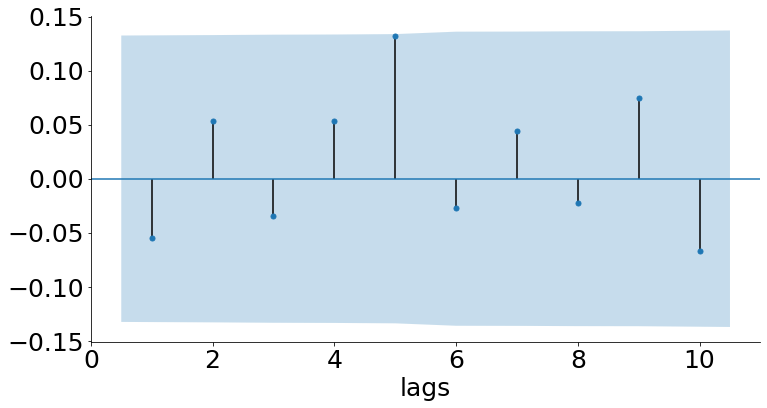

In [30]:
fig, ax = plt.subplots(1, figsize=(12, 6))

auto_c = plot_acf(cali_week, lags = 10, zero=False, title='', ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel('', fontsize = 25);
plt.yticks(fontsize = 25);
plt.xlabel('lags', fontsize = 25);
plt.xticks(fontsize = 25);


os.chdir('/Users/josefinebjornholm/Documents/GitHub/Gun_Violence_E19/Figures')
auto_c.savefig("auto_c.pdf", bbox_inches='tight')

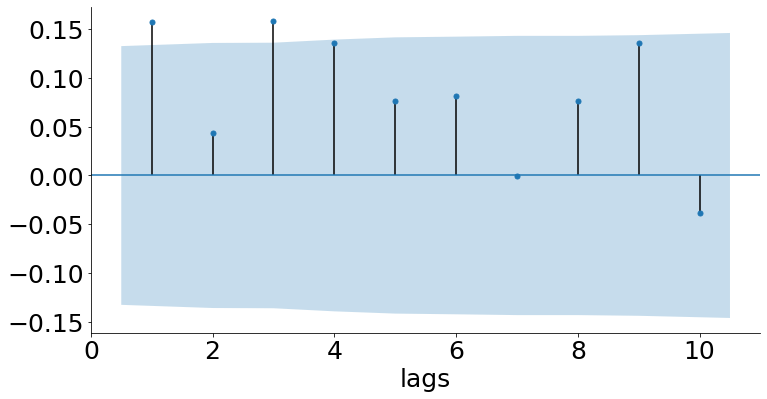

In [31]:
fig, ax = plt.subplots(1, figsize=(12, 6))
auto_NE = plot_acf(NE_week, lags = 10, zero = False, title='', ax = ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel('', fontsize = 25);
plt.yticks(fontsize = 25);
plt.xlabel('lags', fontsize = 25);
plt.xticks(fontsize = 25);


auto_NE.savefig("auto_NE.pdf", bbox_inches='tight')

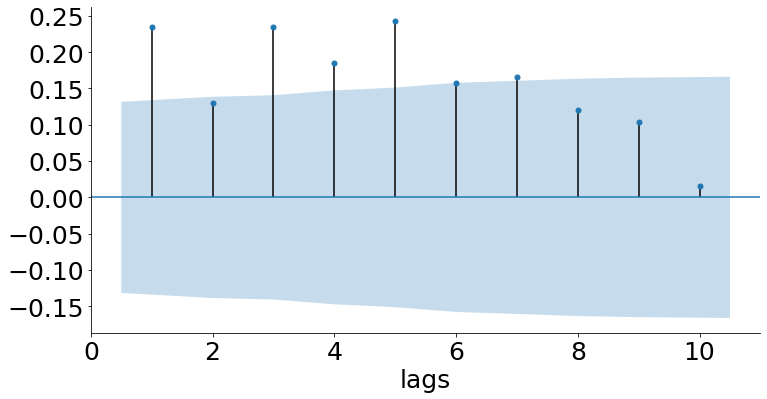

In [32]:
fig, ax = plt.subplots(1, figsize=(12, 6))


auto_MA = plot_acf(MA_week, lags = 10, zero = False, title='', ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel('', fontsize = 25);
plt.yticks(fontsize = 25);
plt.xlabel('lags', fontsize = 25);
plt.xticks(fontsize = 25);

auto_MA.savefig("auto_MA.pdf", bbox_inches='tight')

## AR models

In [26]:
model = ARIMA(NE_week, order=(4,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:          Mass Shooting   No. Observations:                  219
Model:                     ARMA(4, 0)   Log Likelihood                -285.334
Method:                       css-mle   S.D. of innovations              0.890
Date:                Tue, 14 Jan 2020   AIC                            582.667
Time:                        09:11:09   BIC                            603.002
Sample:                    01-06-2014   HQIC                           590.880
                         - 03-12-2018                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.0126      0.094     10.735      0.000       0.828       1.197
ar.L1.Mass Shooting     0.1362      0.067      2.029      0.044       0.005       0.268
ar.L2.Mass Shoot

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


In [28]:
model = ARIMA(MA_week, order=(6,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:          Mass Shooting   No. Observations:                  222
Model:                     ARMA(6, 0)   Log Likelihood                -316.415
Method:                       css-mle   S.D. of innovations              1.005
Date:                Tue, 14 Jan 2020   AIC                            648.830
Time:                        09:11:26   BIC                            676.051
Sample:                    12-30-2013   HQIC                           659.820
                         - 03-26-2018                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.9585      0.161      5.940      0.000       0.642       1.275
ar.L1.Mass Shooting     0.1564      0.067      2.324      0.021       0.024       0.288
ar.L2.Mass Shoot